In [4]:
print("--setting 시작--")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from plotnine import *
import warnings
warnings.filterwarnings(action='ignore')
#한글 깨짐 방지
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path ='./data/NanumBarunGothic_0.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)
print("--setting 끝--")

--setting 시작--
--setting 끝--


In [5]:
train = pd.read_csv(r'./data/train.csv')
test = pd.read_csv(r'./data/test.csv')

print('train data shape:', train.shape)
print('test data shape:', test.shape)
print('------------[train infomation]------------')
print(train.info())

train data shape: (891, 12)
test data shape: (418, 11)
------------[train infomation]------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


In [6]:
#공통 코드
#object변수로 변형
train['Survived'] = train['Survived'].astype(object)
dataset_ = [train,test]

In [7]:
print(train.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:
print('---[test infomation]---')
print(test.info())

---[test infomation]---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB
None


In [9]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    print("feature_size\n",feature_size)
    print("feauture_index\n",feature_index)
    print("survived count\n",survived)
    print("dead count\n", dead)
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in totla')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1,feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index],dead[index]], labels=['Survived','Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    plt.show()

feature_size
 2
feauture_index
 Index(['female', 'male'], dtype='object')
survived count
 female    233
male      109
Name: Sex, dtype: int64
dead count
 male      468
female     81
Name: Sex, dtype: int64


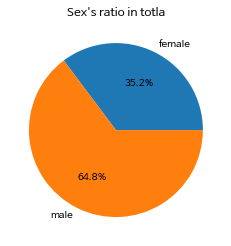

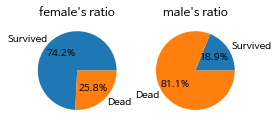

feature_size
 3
feauture_index
 Int64Index([1, 2, 3], dtype='int64')
survived count
 1    136
3    119
2     87
Name: Pclass, dtype: int64
dead count
 3    372
2     97
1     80
Name: Pclass, dtype: int64


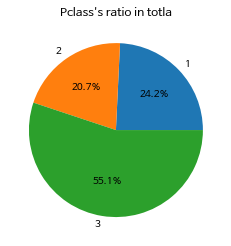

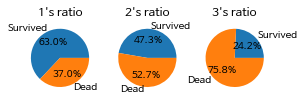

feature_size
 3
feauture_index
 Index(['C', 'S', 'Q'], dtype='object')
survived count
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead count
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


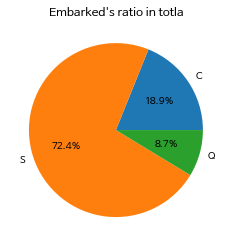

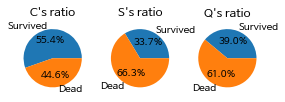

In [10]:
pie_chart('Sex')
pie_chart('Pclass')
pie_chart('Embarked')

In [11]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    print("Survived",survived)
    print("dead",dead)
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True)
    plt.show()

Survived 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
dead 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


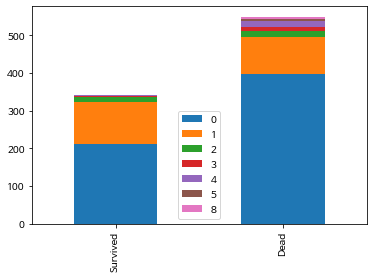

Survived 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
dead 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


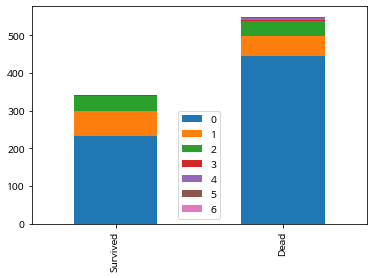

Survived S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead S    427
C     75
Q     47
Name: Embarked, dtype: int64


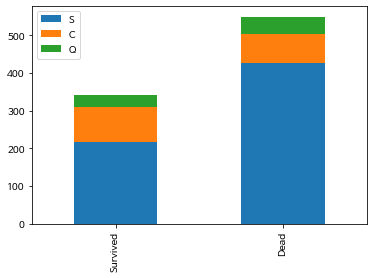

In [12]:
bar_chart("SibSp")
bar_chart("Parch")
bar_chart("Embarked")

In [13]:
def ggplot_bar(feature):
    plot = (
    ggplot(train)
    + aes(x = feature, fill='Survived')
    + geom_bar(position = 'dodge')
    + labs(title=feature + "별 생존여부")
    + theme(text=element_text(family='NanumBarunGothic')))
    print(plot)

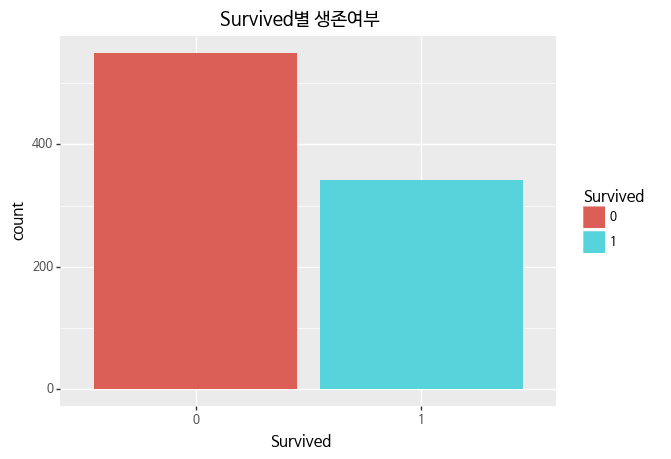

<ggplot: (21347337)>


In [14]:
ggplot_bar("Survived")

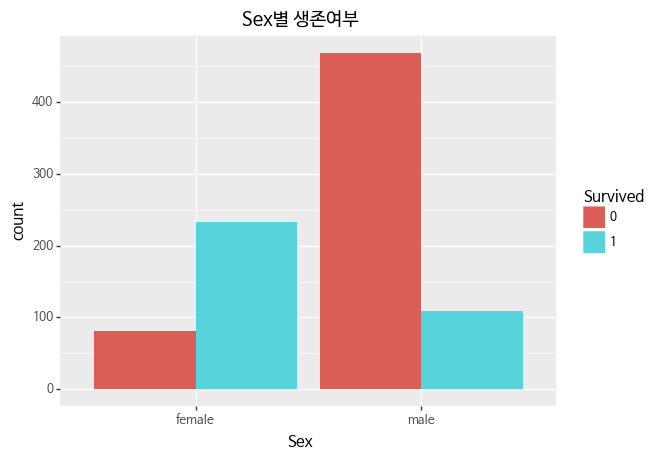

<ggplot: (21359881)>


In [15]:
#sex Fature
#string 변수로 변형
for dataset in dataset_: # 전처리
    dataset['Sex'] = dataset['Sex'].astype(str)

ggplot_bar("Sex")

train.isnull().sum() PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
train.isnull().sum() PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


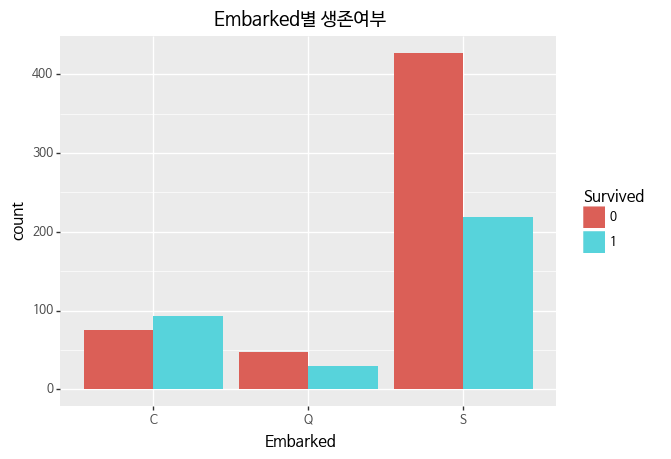

<ggplot: (21359947)>


In [16]:
#embarked Feature
print("train.isnull().sum()",train.isnull().sum())
train['Embarked'].value_counts(dropna=False)
for dataset in dataset_: # 전처리
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

print("train.isnull().sum()",train.isnull().sum())
ggplot_bar("Embarked")

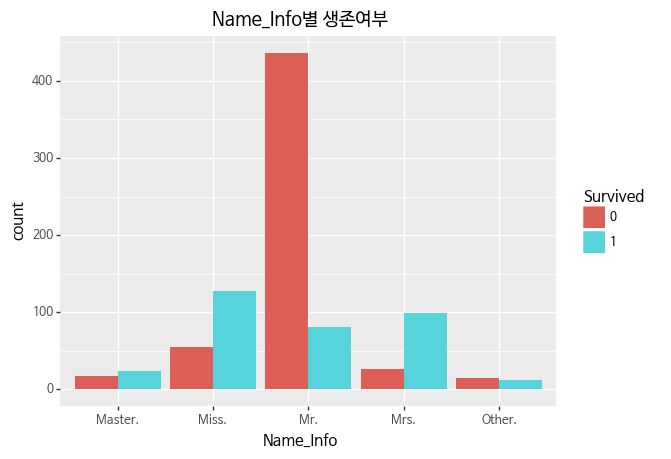

<ggplot: (21409165)>


In [17]:
#name
for dataset in dataset_: # 전처리
    dataset["Name_Info"] = [re.findall('[A-Za-z]+\.',name)[0] for name in dataset['Name']]
    dataset['Name_Info'] = [ni if ni in ['Master.','Miss.','Mr.','Mrs.'] else 'Other.' for ni in dataset['Name_Info']]
    dataset['Name_Info'] = dataset['Name_Info'].astype(str)
    
ggplot_bar("Name_Info")


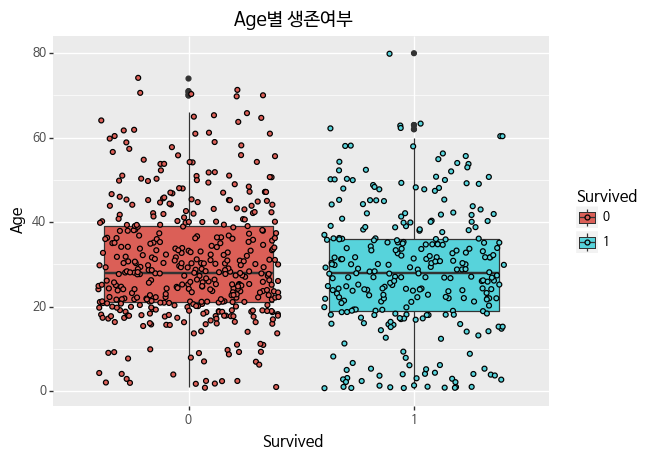

<ggplot: (21240765)>


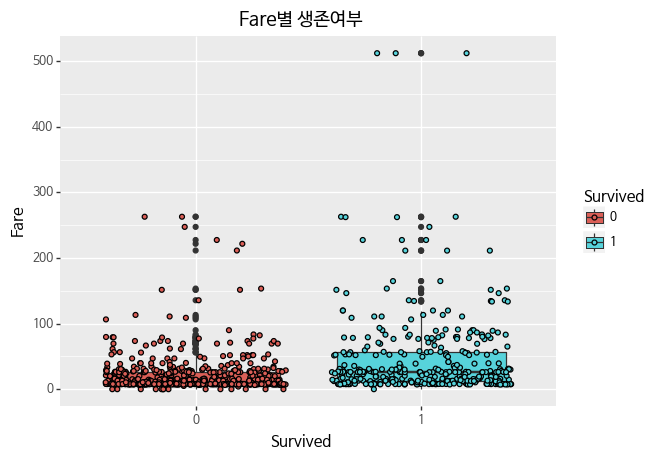

<ggplot: (21246115)>


In [18]:
#age, fare
def ggplot_boxplot(feature):
    plot = (
    ggplot(train)
    + aes(x = 'Survived', y = feature, fill = 'Survived')
    + geom_boxplot()
    + geom_jitter()
    + labs(title=feature + "별 생존여부")
    + theme(text=element_text(family='NanumBarunGothic')))
    print(plot)
ggplot_boxplot("Age")
ggplot_boxplot("Fare")

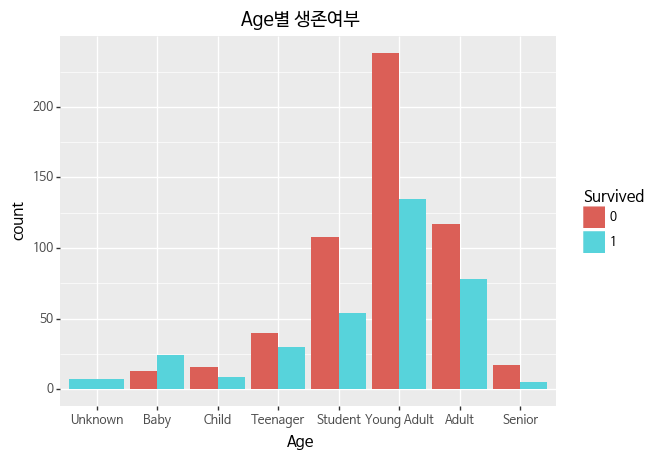

<ggplot: (21307811)>


In [19]:
#age 범주화
for dataset in dataset_: # 전처리
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    bins = (-1,0,5,12,18,25,35,60,120)
    group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
    categories = pd.cut(dataset['Age'], bins, labels=group_names)
    dataset['Age'] = categories
    
ggplot_bar("Age")

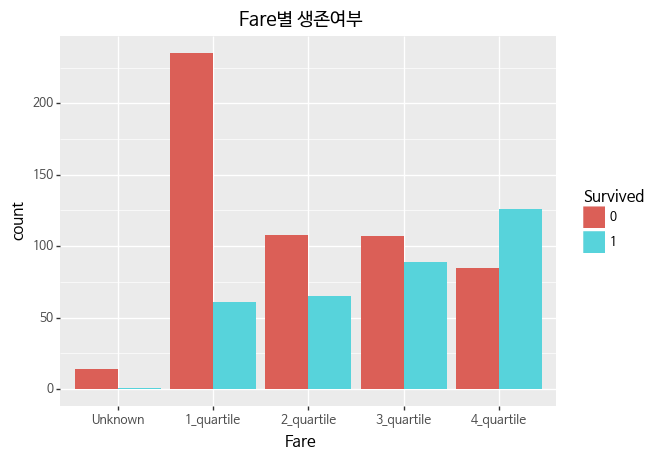

<ggplot: (21301599)>


In [20]:
#fare 범주화
for dataset in dataset_: #전처리
    dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(int)
    bins = (-1,0,8,15,31,1000)
    group_names = ['Unknown', '1_quartile','2_quartile','3_quartile','4_quartile']
    categories = pd.cut(dataset['Fare'], bins, labels=group_names)
    dataset['Fare'] = categories
ggplot_bar("Fare") # 실행

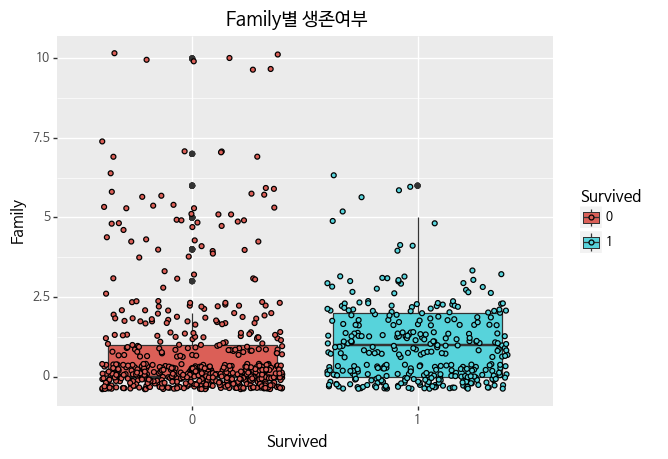

<ggplot: (21485817)>


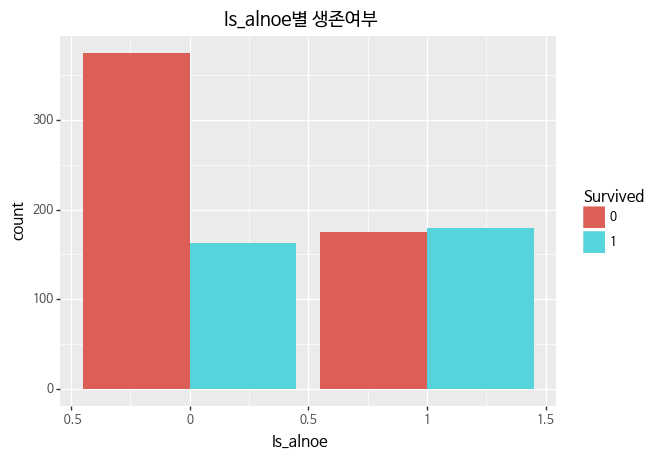

<ggplot: (23322273)>


In [21]:
#sibsp&Parch Feature
#family, is_alone 파생 변수
for dataset in dataset_:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)
    dataset['Is_alnoe'] = [0 if fm == 0 else 1 for fm in dataset["Family"]]
    
ggplot_boxplot("Family")
ggplot_bar("Is_alnoe")

In [22]:
#전처리
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)

#실행
print(train.head())
print(test.head())

  Survived  Pclass     Sex          Age        Fare Embarked Name_Info  \
0        0       3    male      Student  1_quartile        S       Mr.   
1        1       1  female        Adult  4_quartile        C      Mrs.   
2        1       3  female  Young Adult  1_quartile        S     Miss.   
3        1       1  female  Young Adult  4_quartile        S      Mrs.   
4        0       3    male  Young Adult  1_quartile        S       Mr.   

   Family  Is_alnoe  
0       1         1  
1       1         1  
2       0         0  
3       1         1  
4       0         0  
   PassengerId  Pclass     Sex          Age        Fare Embarked Name_Info  \
0          892       3    male  Young Adult  1_quartile        Q       Mr.   
1          893       3  female        Adult  1_quartile        S      Mrs.   
2          894       2    male       Senior  2_quartile        Q       Mr.   
3          895       3    male  Young Adult  1_quartile        S       Mr.   
4          896       3  female   

In [23]:
# one-hot 인코딩
train['Survived'] = train['Survived'].astype(int)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Family', 'Is_alnoe', 'Sex_female', 'Sex_male',
       'Age_Unknown', 'Age_Baby', 'Age_Child', 'Age_Teenager', 'Age_Student',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Fare_Unknown',
       'Fare_1_quartile', 'Fare_2_quartile', 'Fare_3_quartile',
       'Fare_4_quartile', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Name_Info_Master.', 'Name_Info_Miss.', 'Name_Info_Mr.',
       'Name_Info_Mrs.', 'Name_Info_Other.'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Family', 'Is_alnoe', 'Sex_female', 'Sex_male',
       'Age_Unknown', 'Age_Baby', 'Age_Child', 'Age_Teenager', 'Age_Student',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Fare_Unknown',
       'Fare_1_quartile', 'Fare_2_quartile', 'Fare_3_quartile',
       'Fare_4_quartile', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Name_Info_Master.', 'Name_Info_Miss.', 'Name_Info_Mr.',
       'Name_Info_Mrs.', 'Name_Info_Other.'],
      dtype='object')


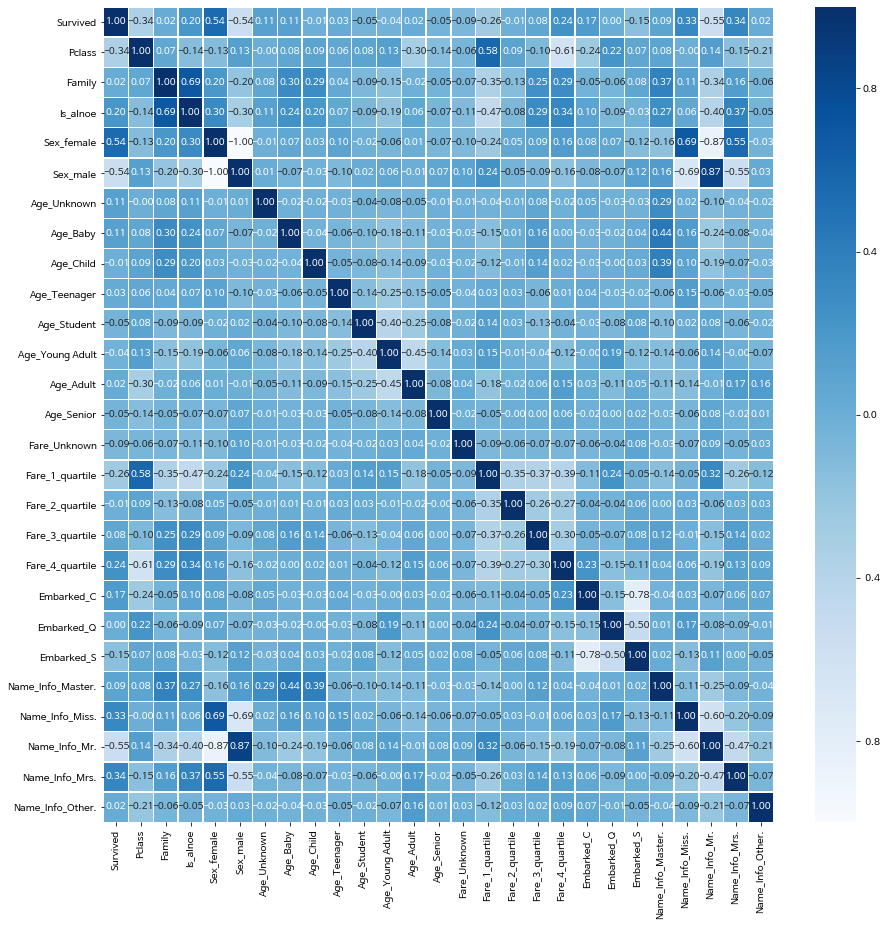

In [24]:
#corr heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f',linewidths=.5, cmap='Blues')
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_label = train[['Survived']]
train_data = train.drop('Survived', axis=1)

print(train_label.columns)
print(train_data.columns)

Index(['Survived'], dtype='object')
Index(['Pclass', 'Family', 'Is_alnoe', 'Sex_female', 'Sex_male', 'Age_Unknown',
       'Age_Baby', 'Age_Child', 'Age_Teenager', 'Age_Student',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Fare_Unknown',
       'Fare_1_quartile', 'Fare_2_quartile', 'Fare_3_quartile',
       'Fare_4_quartile', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Name_Info_Master.', 'Name_Info_Miss.', 'Name_Info_Mr.',
       'Name_Info_Mrs.', 'Name_Info_Other.'],
      dtype='object')


In [26]:
# 데이터 split, 모델 학습, 예측
def train_and_test(model,train_data,train_label,test):
    X_train,X_test,Y_train,Y_test = \
    train_test_split(train_data, train_label, test_size=0.2, shuffle=True, random_state=5)
    model.fit(X_train, Y_train)
    train_prediction = model.predict(X_test)
    accuracy = round(accuracy_score(Y_test, train_prediction) * 100,2)
    print("model:",model)
    print("Accuracy:",accuracy,"%")
    prediction = model.predict(test.drop(["PassengerId"], axis = 1)) #검증을 위한 테스트
    return prediction

#모델링
pred = train_and_test(LogisticRegression(), train_data, train_label,test)

model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 84.36 %


In [52]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived":pred})
submission.to_csv(r'./data/submission.csv', index=False)

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#분류모델 리스트
model_list = [LogisticRegression(),
             SVC(),
             RandomForestClassifier(),
             KNeighborsClassifier(),
             GradientBoostingClassifier()]
#5개 모델 출ㄹ력
print(model_list)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_

In [54]:
#각 모델 gkdlvj vkfkalxj
lg_param = {
    "C":np.logspace(-3,3,7),
    "penalty":["I1","I2"]
}
svm_param = {
    "C":[0.001, 0.01,0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1]
}
rf_param = {
    'bootstrap':[True],
    'max_depth':[10,20,30,40,50],
    'max_features':['auto','sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split':[2,5,10],
    'n_estimators': [200,400.600]
}

In [55]:
knn_param = {"n_neighbors": [3,5,7,9],
            "weights": ['uniform','distance'],
            "metric": ['euclidean','manhattan']}
gbm_param = {
    "loss": ["deviance"],
    "learning_rate": [0.01,0.025,0.05,0.075, 0.1,0.15,0.2],
    "min_samples_split" : np.linspace(0.1,0.5,6),
    "min_samples_leaf": np.linspace(0.1,0.5,6),
    "max_depth" : [3,5,8],
    "max_features":["sqrt"],
    "criterion":["friedman_mse","mae"],
    "subsample":[0.5,0.6,0.7,0.8,0.9,1.0],
    "n_estimators":[10,30,50,70]
}

param_list = [lg_param, svm_param, rf_param, knn_param, gbm_param]

In [63]:
def multi_model_gridsearch_gridsearch_cv_df(grid_list, train_data, train_label, test):
    train_acc = [] # 모델 개별 train set 정확도
    train_accum_acc = [] # 모델 누적 train set voting 정확도
    best_param = [] # 각 모델 best parameter
    #train, test split
    X_train, X_test, Y_test, Y_test = train_test_split(train_data, train_label, test_size=0.2, shuffle=True, random_state=5)
    #초기화
    train_pred_accum_sum = [0] * len(X_test)
    submission_df = test[["PassengerId"]]
    
    for i, modle in enumerate(grid_list):
        # train set 학습 및 예측
        model.fit(X_train, Y_train)
        train_predction = model.predict(X_test)
        accuracy = round(accuracy_score(Y_test, train_predction)* 100,2)
        train_acc += [accuracy]
        best_param += [model.best_params_]
        
        # train set 누적 voting 정확도
        train_pred_accum_sum = [sum(tp) for tp in list(zip(train_pred_accum_sum, train_predction))]
        accum_accuray = round(accuracy_score(Y_test, (np.array(train_pred_accum_sum) / (i+1)) > 0.5) * 100,2)
        train_accum_acc = [accum_accuray]
        
        #test set 예측 및 submission 생성
        prediction = model.predict(test.drop(["PassengerId"], axis = 1))
        submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived_"+str(i): prediction})
        submission.to_csv(r'./data/submission_' + str(i) +'.csv',index=False)
        submission_df = pd.merge(submission_df,submission)
        print("====" + str(i) + "model train finished" + "====")
    print("train accuacy :",train_acc); print("train accumulate vote accuracy : ", train_accum_acc); print("best param:", best_params)
    return submission_df
    
    

In [57]:
#각 모델별 hyper parameter 탐색
#train set 누적 votiong 기법 적용
submission_df = multi_model_gridsearch_gridsearch_cv_df(grid_list, train_data, train_label, test)


NameError: name 'grid_list' is not defined

In [64]:
def model_voting(submissionssion_df):
    submission_final = pd.DataFrame({
        "PassengerId" : submission_df['PassengerId'],
        "Survived" : submission_df.iloc[:,1:].mean(axis = 1).map(lambda x:x>0.5).astype(int)
    })
    return submissionssion_df

#모델 결과 voting
print("submission_df : \n",submission_df.head())

submission_final = model_votiong(submission_df)

submission_final.to_csv('./data/submission_final.csv', index=False)

NameError: name 'submission_df' is not defined